In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_loan=pd.read_csv('lending_club_loan_two.csv')

In [6]:
df_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [11]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [13]:
df_loan.head()['loan_status']

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

C:\Users\mrsna\AppData\Local\Temp\ipykernel_16948\168344717.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_loan,x='loan_status',palette='RdYlGn')


<Axes: xlabel='loan_status', ylabel='count'>

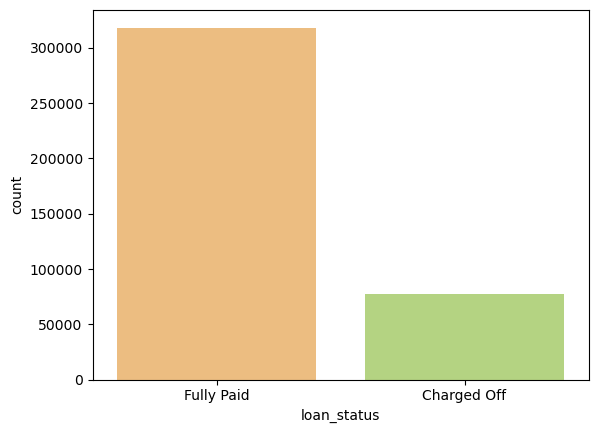

In [10]:
sns.countplot(df_loan,x='loan_status',palette='RdYlGn')

<Axes: xlabel='loan_status', ylabel='count'>

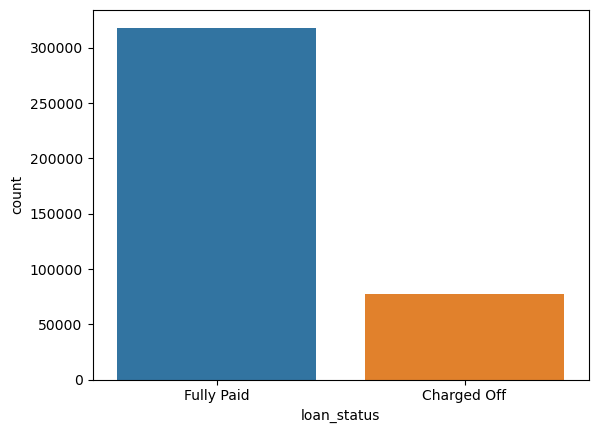

In [16]:
sns.countplot(df_loan,x='loan_status',hue='loan_status') ##palette='RdYlGn'

<Axes: xlabel='loan_amnt', ylabel='Count'>

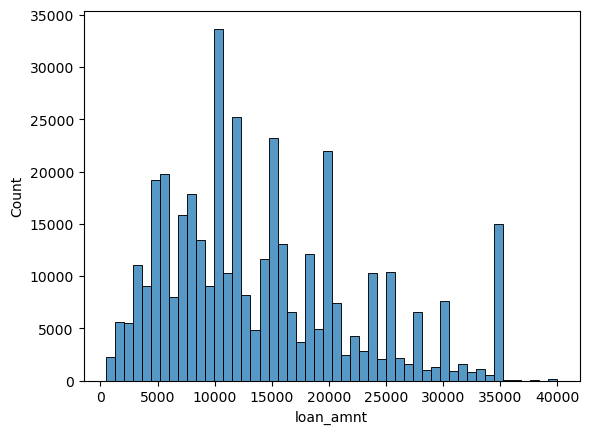

In [47]:
sns.histplot(data=df_loan,x='loan_amnt',bins=50)

In [44]:
df_loan.corr(numeric_only=True)['loan_amnt']

loan_amnt               1.000000
int_rate                0.168921
installment             0.953929
annual_inc              0.336887
dti                     0.016636
open_acc                0.198556
pub_rec                -0.077779
revol_bal               0.328320
revol_util              0.099911
total_acc               0.223886
mort_acc                0.222315
pub_rec_bankruptcies   -0.106539
Name: loan_amnt, dtype: float64

<Axes: >

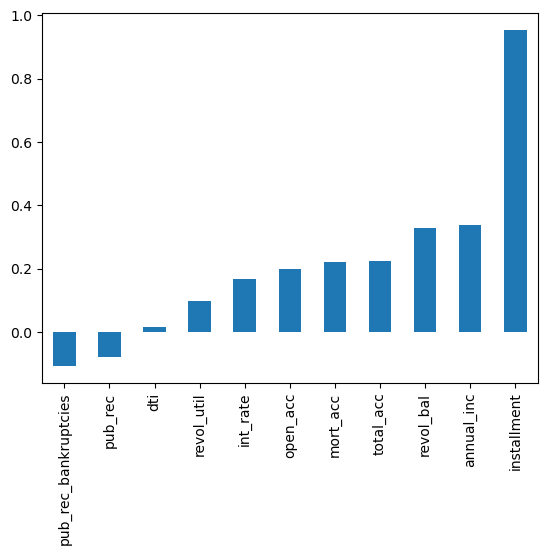

In [42]:
df_loan.corr(numeric_only=True)['loan_amnt'].drop('loan_amnt').sort_values().plot(kind='bar')

<Axes: >

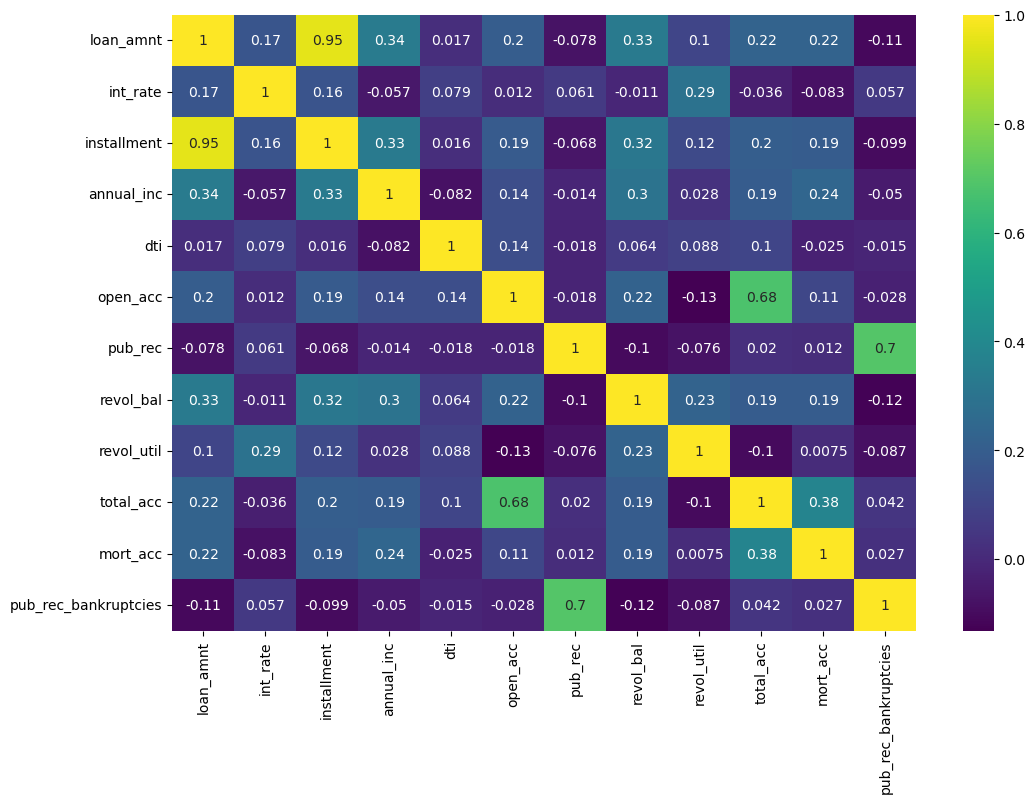

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(df_loan.corr(numeric_only=True),annot=True,cmap='viridis')

<Axes: xlabel='loan_amnt', ylabel='installment'>

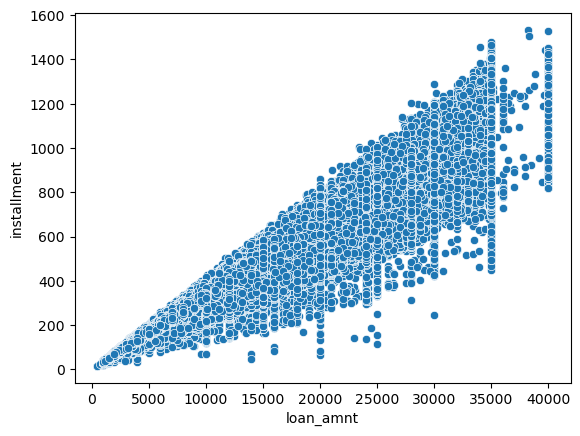

In [69]:
##high corelation between loan_amnt and installment
sns.scatterplot(x='loan_amnt',y='installment',data=df_loan)

C:\Users\mrsna\AppData\Local\Temp\ipykernel_14380\1477928435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_loan,x='loan_status',y='loan_amnt',palette='RdYlGn')


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

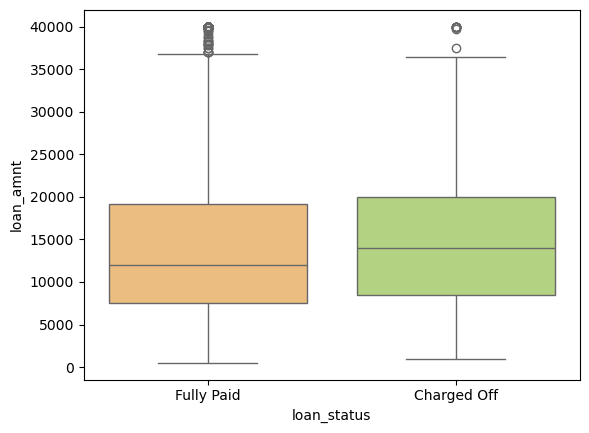

In [73]:
###box plot between loan amount and loan_status

sns.boxplot(data=df_loan,x='loan_status',y='loan_amnt',palette='RdYlGn')

In [56]:
## summary stats for loan_amnt group by loan status
### similar to box plot easy to read

df_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [99]:
### unique grade and subgrades

df_loan['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

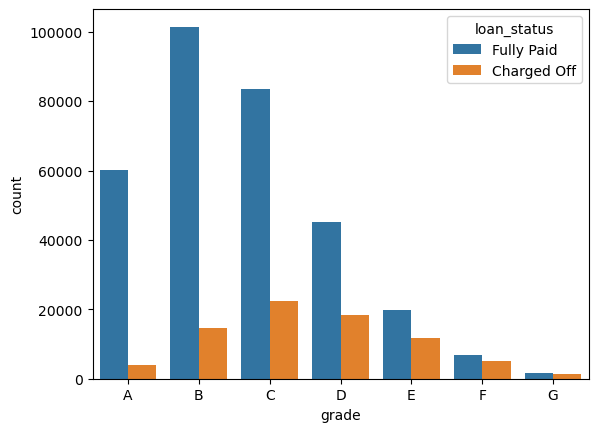

In [125]:
### countplot per grade and hue loan_status

sns.countplot(df_loan,x='grade',hue='loan_status',order=sorted(df_loan['grade'].unique()))

In [117]:
sorted(df_loan['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='sub_grade', ylabel='count'>

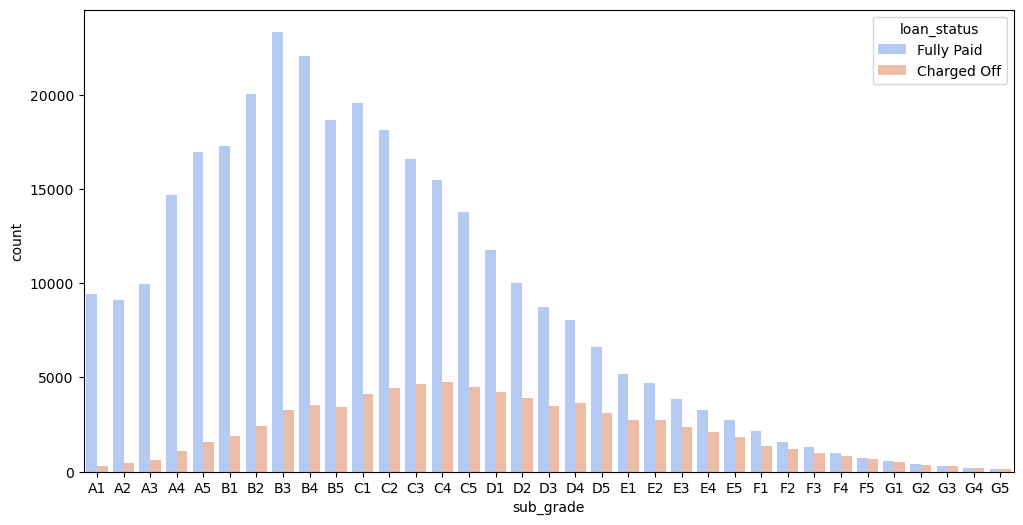

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df_loan,hue='loan_status',order=sorted(df_loan['sub_grade'].unique()),palette='coolwarm')

In [127]:
## create a new column loan_repaid with 0 or 1 according to loan_status

df_loan['loan_repaid']=df_loan['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [131]:
df_loan[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [155]:
#### create a bar graph of corelation with other columns with loan_repaid

df_loan.corr(numeric_only=True)['loan_repaid'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<Axes: >

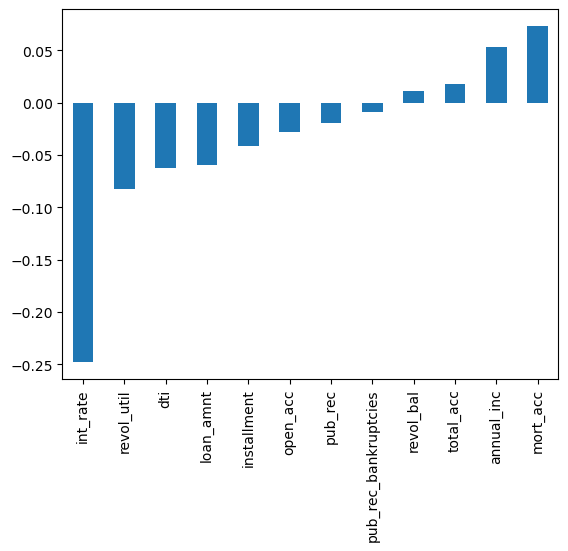

In [161]:
df_loan.corr(numeric_only=True)['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

In [62]:
###missing value

df_loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [169]:
#### derive the percentage of data is missing

(df_loan.isnull().sum()/len(df_loan))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [177]:
## emp_title
# 173105 unique values
df_loan['emp_title'].nunique()

173105

In [181]:
df_loan['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [66]:
### lots of emp title so we can drop this

df_mod=df_loan.drop('emp_title',axis=1)

In [195]:
#### percentage of loan charged off and paid off by emp length

df_mod['emp_length'].value_counts(), df_mod['loan_status'].value_counts()

(emp_length
 10+ years    126041
 2 years       35827
 < 1 year      31725
 3 years       31665
 5 years       26495
 1 year        25882
 4 years       23952
 6 years       20841
 7 years       20819
 8 years       19168
 9 years       15314
 Name: count, dtype: int64,
 loan_status
 Fully Paid     318357
 Charged Off     77673
 Name: count, dtype: int64)

In [215]:
df_paid=df_mod[df_mod['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [72]:
df_mod[df_mod['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [219]:
df_unpaid=df_mod[df_mod['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [249]:
#### percentage of loan unpaid

(df_unpaid/(df_paid+df_unpaid))*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

In [241]:
sorted(df_mod['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [243]:
length_order=['< 1 year',
 '1 year', 
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
 ]

<Axes: xlabel='emp_length', ylabel='count'>

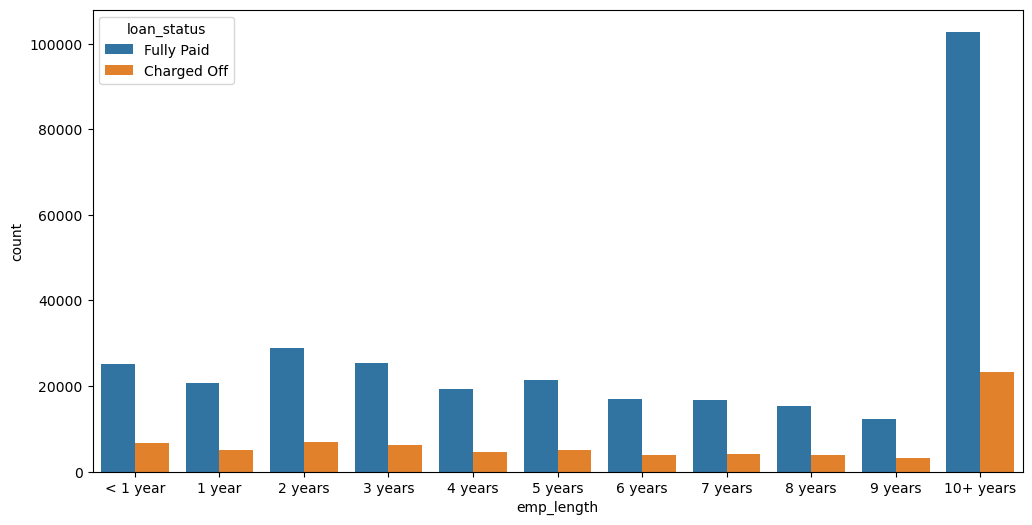

In [245]:
plt.figure(figsize=(12,6))
sns.countplot(df_mod,x='emp_length',hue='loan_status',order=length_order)

In [251]:
#### percentage of loan unpaid

(df_unpaid/(df_paid+df_unpaid))*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

In [253]:
emp_len=(df_unpaid/(df_paid+df_unpaid))*100

<Axes: xlabel='emp_length'>

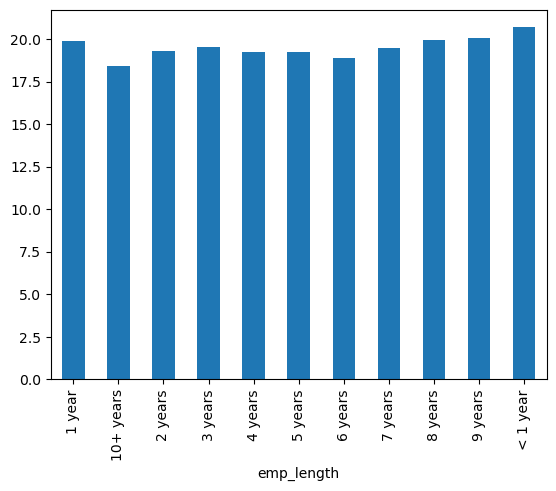

In [257]:
emp_len.plot(kind='bar')
#### so the percentage of unpaid loan is 20% across all age group, so we can dop the column

In [259]:
df_mod=df_mod.drop('emp_length',axis=1)

In [261]:
df_mod.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [263]:
df_mod['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [265]:
## we can drop the title column as its a subset of purpose
df_mod=df_mod.drop('title',axis=1)

In [271]:
### filling the na values on the bais of anothe columns ## mort_acc
df_mod['mort_acc'].value_counts()   ### number of mortgage account

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [285]:
## find which column have the high corelation with mort_acc so we can replace
### either we can drop the mort_acc column or replace the value, we cant dropna as we are gooing to loose 10% value
df_mod.corr(numeric_only=True)['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [299]:
### going to group by total_acc and mean of mort_acc
grouped_avg=df_mod.groupby('total_acc')['mort_acc'].transform('mean')

# df_mod.transform
# >>> df
#          Date  Data
# 0  2015-05-08     5
# 1  2015-05-07     8
# 2  2015-05-06     6
# 3  2015-05-05     1
# 4  2015-05-08    50
# 5  2015-05-07   100
# 6  2015-05-06    60
# 7  2015-05-05   120
# >>> df.groupby('Date')['Data'].transform('sum')
# 0     55
# 1    108
# 2     66
# 3    121
# 4     55
# 5    108
# 6     66
# 7    121

In [297]:
len(grouped_avg),len(df_mod)

(396030, 396030)

In [301]:
df_mod['mort_acc']=df_mod['mort_acc'].fillna(grouped_avg)

In [309]:
df_mod.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [307]:
df_mod.drop('revol_util',axis=1,inplace=True)
df_mod.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [311]:
## identify categorical columns
df_mod.select_dtypes(include=['object', 'category']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [313]:
df_mod['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [315]:
df_mod['term']=df_mod['term'].apply(lambda x: int(x.split()[0]))

In [317]:
df_mod['term'].value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

In [319]:
## grade is a part of sub_grade, so we can drop grade
df_mod.drop('grade',axis=1,inplace=True)

In [333]:
df_mod=pd.get_dummies(df_mod,columns=['sub_grade'],drop_first=True,dtype=float)

In [335]:
### convert 'verification_status','purpose', 'application_type','initial_list_status',

df_mod=pd.get_dummies(df_mod,columns=['verification_status','purpose', 'application_type','initial_list_status'],drop_first=True,dtype=float)

In [339]:
df_mod['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [341]:
### replace none and any to other

df_mod['home_ownership'].replace(['NONE','ANY'],'OTHER',inplace=True)

In [343]:
df_mod['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [345]:
df_mod=pd.get_dummies(df_mod,columns=['home_ownership'],drop_first=True,dtype=float)

In [353]:
df_mod['address']=df_mod['address'].apply(lambda x: x[-5:])

In [349]:
str='0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [351]:
str[-5:]

'22690'

In [355]:
df_mod['address'].value_counts()

address
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [357]:
df_mod=pd.get_dummies(df_mod,columns=['address'],drop_first=True,dtype=float)

In [367]:
df_mod.drop('issue_d',axis=1,inplace=True)
### issue date

In [373]:
## earliest_cr_line need to extract the year

df_mod['earliest_cr_line']=df_mod['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [375]:
from sklearn.model_selection import train_test_split

In [389]:
df_mod.drop('loan_status',axis=1,inplace=True)

In [391]:
X=df_mod.drop('loan_repaid',axis=1)
y=df_mod['loan_repaid']

In [393]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [395]:
from sklearn.preprocessing import MinMaxScaler

In [397]:
scaler=MinMaxScaler()

In [399]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [401]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [403]:
X_train.shape

(316824, 76)

In [405]:
model=Sequential()

In [407]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [409]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [411]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[early_stop],workers=5,use_multiprocessing=True)

Epoch 1/30
9901/9901 [==============================] - 27s 3ms/step - loss: 0.2588 - val_loss: 0.2586
Epoch 2/30
9901/9901 [==============================] - 30s 3ms/step - loss: 0.2591 - val_loss: 0.2584
Epoch 3/30
9901/9901 [==============================] - 31s 3ms/step - loss: 0.2588 - val_loss: 0.2591
Epoch 4/30
9901/9901 [==============================] - 29s 3ms/step - loss: 0.2588 - val_loss: 0.2586
Epoch 5/30
4131/9901 [===========>..................] - ETA: 15s - loss: 0.2573

In [417]:
df_loss=pd.DataFrame(model.history.history)

<Axes: >

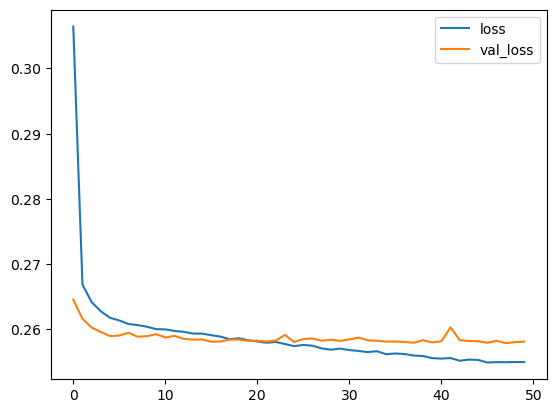

In [419]:
df_loss.plot()

In [421]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [429]:
predictions=model.predict(X_test)

2476/2476 [==============================] - 3s 1ms/step


In [ ]:
prediction=(model.predict(X_test)>0.5).astype('int32')

In [431]:
predictions

array([[1.       ],
       [0.7006539],
       [1.       ],
       ...,
       [1.       ],
       [1.       ],
       [1.       ]], dtype=float32)

In [425]:
classification_report(y_test,predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets